# Notebook 4 - Model 3. Random Forest Regression 

## Simon Kennedy a1792695

## Loading the clean and preprocessed dataset

In [20]:
import numpy as np
import pandas as pd

cancer_df = pd.DataFrame(pd.read_csv("cancer_clean.csv"))
cancer_df.head()     

,avgAnnCount,TARGET_deathRate,incidenceRate,povertyPercent,studyPerCap,binnedInc,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,...,PctPrivateCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,State
0,1397.0,164.9,489.8,11.2,499.748204,10,36.9,41.7,2.54,52.5,...,75.1,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,47
1,173.0,161.3,411.6,18.6,23.111234,7,32.2,33.7,2.34,44.5,...,70.2,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,47
2,102.0,174.7,349.7,14.6,47.560164,7,44.0,45.8,2.62,54.2,...,63.7,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,47
3,427.0,194.8,430.4,17.1,342.637253,5,42.2,43.4,2.52,52.7,...,58.4,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,47
4,57.0,144.4,350.1,12.5,0.000000,7,47.8,48.9,2.34,57.8,...,61.6,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,47


## Splitting the dataset into Training and Tesing data

### Data Segregation

In [21]:
X = cancer_df.drop(columns = ['TARGET_deathRate'])
y = cancer_df['TARGET_deathRate']

X.shape, y.shape

((3009, 26), (3009,))

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
# test_size is default 0.25 if train_size also none. i.e. train = 0.75, train = 0.25
#defining a seed to get the same split in the data
print(X_train.shape)
print(X_test.shape)

(2256, 26)
(753, 26)


## k fold cross-validation to split the data

In [34]:
# Creating the K-Fold ojbect
from sklearn.model_selection import KFold
cv_method = KFold(n_splits = 3)

# Performing the K-Fold Cross-Validation
for train_index, test_index in cv_method.split(cancer_df):
    
    # Obtaining the index for the training and test sets for the subset
    print("First five train index:", train_index[0:5], "First five test index:", test_index[0:5])
    print('Shape of the Training set:', train_index.shape, 'Shape of the Test set:',test_index.shape, '\n')

First five train index: [1003 1004 1005 1006 1007] First five test index: [0 1 2 3 4]
Shape of the Training set: (2006,) Shape of the Test set: (1003,) 

First five train index: [0 1 2 3 4] First five test index: [1003 1004 1005 1006 1007]
Shape of the Training set: (2006,) Shape of the Test set: (1003,) 

First five train index: [0 1 2 3 4] First five test index: [2006 2007 2008 2009 2010]
Shape of the Training set: (2006,) Shape of the Test set: (1003,) 



# Data Modeling

## Model 3. Random Forest Regressor

### Defining the model with scaling and then fitting the model

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# set up the pipeline
RF_model = Pipeline([('scaler', MinMaxScaler()),
                      ('rf', RandomForestRegressor())])

RF_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('rf', RandomForestRegressor())])

#### Getting the RMSE of the predictions

In [36]:
from sklearn.metrics import mean_squared_error

# predicting on the training data
y_train_predict = RF_model.predict(X_train)
# predicting on the test data
y_test_predict = RF_model.predict(X_test)

MSE_train = mean_squared_error(y_train, y_train_predict)
RMSE_train = np.sqrt(MSE_train)
MSE_test = mean_squared_error(y_test, y_test_predict)
RMSE_test = np.sqrt(MSE_test)

print('The RF model Mean Square Error on training data is : ', MSE_train)
print('The RF model RMSE on training data is ', RMSE_train)
print('The RF model Mean Square Error on test data is : ', MSE_test)
print('The RF model RMSE on test data is ', RMSE_test)

The RF model Mean Square Error on training data is :  51.002088380319094
The RF model RMSE on training data is  7.141574642914481
The RF model Mean Square Error on test data is :  362.61432763213793
The RF model RMSE on test data is  19.04243491867933


The RMSE of the test data is much greater than the training data. This suggests overfitting.

# Hyperparameter tuning

## Creating the parameter grid and using GridSearchCV to find the best parameters

In [37]:
RF_model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'rf', 'scaler__clip', 'scaler__copy', 'scaler__feature_range', 'rf__bootstrap', 'rf__ccp_alpha', 'rf__criterion', 'rf__max_depth', 'rf__max_features', 'rf__max_leaf_nodes', 'rf__max_samples', 'rf__min_impurity_decrease', 'rf__min_impurity_split', 'rf__min_samples_leaf', 'rf__min_samples_split', 'rf__min_weight_fraction_leaf', 'rf__n_estimators', 'rf__n_jobs', 'rf__oob_score', 'rf__random_state', 'rf__verbose', 'rf__warm_start'])

In [38]:
# Callibrating GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 500, 800, 1200]
max_depth = [5, 10, 25, 30]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1,2,5]

param_grid = dict(rf__n_estimators = n_estimators, 
              rf__max_depth = max_depth,
             rf__min_samples_split = min_samples_split,
             rf__min_samples_leaf = min_samples_leaf)

grid_RF = GridSearchCV(RF_model, param_grid, cv=cv_method, scoring='neg_root_mean_squared_error',verbose=2, n_jobs=-1)
%time grid_RF.fit(X_train, y_train)

print('best parameters for RF model: ', grid_RF.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Wall time: 7min 28s
best parameters for RF model:  {'rf__max_depth': 25, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 1200}


#### Assigning the best parameters to the SVR model using grid.best_estimator_

In [39]:
RF_tuned = grid_RF.best_estimator_
RF_tuned

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('rf', RandomForestRegressor(max_depth=25, n_estimators=1200))])

#### Getting the performance of the TUNED model on the testing data

In [40]:
# predicting on the training data
y_tuned_train_predict = RF_tuned.predict(X_train)
# predicting on the test data
y_tuned_test_predict = RF_tuned.predict(X_test)

MSE_tuned_train = mean_squared_error(y_train, y_tuned_train_predict)
RMSE_tuned_train = np.sqrt(MSE_tuned_train)
MSE_tuned_test = mean_squared_error(y_test, y_tuned_test_predict)
RMSE_tuned_test = np.sqrt(MSE_tuned_test)

print('The TUNED Random Forest model Mean Square Error on training data is : ', MSE_tuned_train)
print('The TUNED Random Forest model RMSE on training data is ', RMSE_tuned_train)
print('The TUNED Random Forest model Mean Square Error on test data is : ', MSE_tuned_test)
print('The TUNED Random Forest model RMSE on test data is ', RMSE_tuned_test)

The TUNED Random Forest model Mean Square Error on training data is :  48.99188131416595
The TUNED Random Forest model RMSE on training data is  6.999420069846212
The TUNED Random Forest model Mean Square Error on test data is :  363.8676849155007
The TUNED Random Forest model RMSE on test data is  19.075316115742375


Tuning of the model does not improve the overfitting.

In [41]:
print('Best Cross-Validation Accuracy: ', grid_RF.best_score_)

Best Cross-Validation Accuracy:  -19.136097061183932


## Table of performance results

In [42]:
from tabulate import tabulate

#create data
data = [["Baseline", 823.34, 28.69], 
        ["Untuned", MSE_test, RMSE_test],
       ["Tuned", MSE_tuned_test, RMSE_tuned_test]]
  
#define header names
col_names = ["Model", "MSE", "RMSE"]
  
#display table
print(tabulate(data, headers = col_names))

Model         MSE     RMSE
--------  -------  -------
Baseline  823.34   28.69
Untuned   362.614  19.0424
Tuned     363.868  19.0753


### Plotting the predicted values against the real values

[]

<Figure size 2160x1080 with 0 Axes>

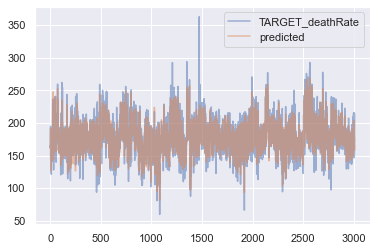

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(30,15))

cancer_df['predicted'] = RF_tuned.predict(X)
cancer_df[['TARGET_deathRate', 'predicted']].plot(alpha=0.5)

plt.plot()

This model has not been saved as it is not the best model.